# Practice with Linear Algebra and Python

This notebook provides some excercises to help practice using Python to solve Linear Algebra questions.

**Reference:** http://quant-econ.net/py/linear_algebra.html

Adapted from the Online Resource

## Vectors

References: http://quant-econ.net/py/linear_algebra.html#vectors

A *vector* of length $n$ is just a sequence (or array, or tuple) of $n$ numbers, which we write as $x = (x_1, \ldots, x_n)$ or  $x = [x_1, \ldots, x_n]$


### Addition

As a matter of definition, when we add two vectors, we add them element by element

$$
    x + y
    =
    \left[
    \begin{array}{c}
        x_1 \\
        x_2 \\
        \vdots \\
        x_n
    \end{array}
    \right]
    +
    \left[
    \begin{array}{c}
         y_1 \\
         y_2 \\
        \vdots \\
         y_n
    \end{array}
    \right]
    :=
    \left[
    \begin{array}{c}
        x_1 + y_1 \\
        x_2 + y_2 \\
        \vdots \\
        x_n + y_n
    \end{array}
    \right]
$$

### Scalar Multiplication

Scalar multiplication is an operation that takes a number $\gamma$ and a vector $x$ and produces

$$
    \gamma x
    :=
    \left[
    \begin{array}{c}
        \gamma x_1 \\
        \gamma x_2 \\
        \vdots \\
        \gamma x_n
    \end{array}
    \right]
$$

Vectors have a natural representation in ``numpy`` using arrays

In [1]:
import numpy as np
x = np.ones(3)
y = np.array((2,4,6))
print("X: %s"%x)
print("Y: %s"%y)

X: [ 1.  1.  1.]
Y: [2 4 6]


In [2]:
x+y

array([ 3.,  5.,  7.])

In [3]:
4*x

array([ 4.,  4.,  4.])

In [4]:
4*y

array([ 8, 16, 24])

### Inner Product and Norm

The *inner product* of vectors $x,y \in \mathbb R ^n$ is defined as

$$
    x' y := \sum_{i=1}^n x_i y_i
$$

Two vectors are called *orthogonal* if their inner product is zero

The *norm* of a vector $x$ represents its "length" (i.e., its distance from the zero vector) and is defined as

$$
    \| x \| := \sqrt{x' x} := \left( \sum_{i=1}^n x_i^2 \right)^{1/2}
$$

The expression $\| x - y\|$ is thought of as the distance between $x$ and $y$

In [5]:
x = np.ones(3)
y = np.array((2,4,6))

In [6]:
np.sum?

In [7]:
np.sum(x * y)    #Inner product of x and y

12.0

In [8]:
np.sqrt(np.sum(x**2))  #Norm of x

1.7320508075688772

In [9]:
np.linalg.norm(x)   #Norm of x

1.7320508075688772

### Span

Given a set of vectors $A := \{a_1, \ldots, a_k\}$ in $\mathbb R ^n$, it's natural to think about the new vectors we can create by performing linear operations

New vectors created in this manner are called *linear combinations* of $A$

In particular, $y \in \mathbb R ^n$ is a linear combination of $A := \{a_1, \ldots, a_k\}$ if

$$
    y = \beta_1 a_1 + \cdots + \beta_k a_k
    \text{ for some scalars } \beta_1, \ldots, \beta_k
$$

In this context, the values $\beta_1, \ldots, \beta_k$ are called the *coefficients* of the linear combination

The set of linear combinations of $A$ is called the *span* of $A$

#### Example

If $A$ contains only one vector $a_1 \in \mathbb R ^2$, then its
span is just the scalar multiples of $a_1$, which is the unique line passing through both $a_1$ and the origin

If $A = \{e_1, e_2, e_3\}$ consists  of the *canonical basis vectors* of $\mathbb R ^3$, that is

$$
    e_1
    :=
    \left[
    \begin{array}{c}
         1 \\
         0 \\
         0
    \end{array}
    \right]
    , \quad
    e_2
    :=
    \left[
    \begin{array}{c}
         0 \\
         1 \\
         0
    \end{array}
    \right]
    , \quad
    e_3
    :=
    \left[
    \begin{array}{c}
         0 \\
         0 \\
         1
    \end{array}
    \right]
$$

then the span of $A$ is all of $\mathbb R ^3$, because, for any
$x = (x_1, x_2, x_3) \in \mathbb R ^3$, we can write

$$
    x = x_1 e_1 + x_2 e_2 + x_3 e_3
$$

Now consider $A_0 = \{e_1, e_2, e_1 + e_2\}$

If $y = (y_1, y_2, y_3)$ is any linear combination of these vectors, then $y_3 = 0$ (check it)

Hence $A_0$ fails to span all of $\mathbb R ^3$

**Excercise \#1:** 

The linear combinations of $v = (1,1,0)$ and $w=(0,1,1)$ fill a plane. Describe this plane and find a vector that is *not* a combination of $v$ and $w$

**Excercise \#2:**
Describe geometrically (line, plane, or all of $R^3$) all linear combinations of

$$
Problem 1: 
\begin{bmatrix}
         1 \\
         2 \\
         3
\end{bmatrix}
and
\begin{bmatrix}
         3 \\
         6 \\
         9
\end{bmatrix}
$$

$$
Problem 2: 
\begin{bmatrix}
    1 \\
    0 \\
    0
\end{bmatrix}
and
\begin{bmatrix}
    0 \\
    2 \\
    3
\end{bmatrix}
$$

$$
Problem 3:
\begin{bmatrix}
    2 \\
    0 \\
    0
\end{bmatrix}
and 
\begin{bmatrix}
    0 \\
    2 \\
    2
\end{bmatrix}
and
\begin{bmatrix}
    2 \\
    2 \\
    3
\end{bmatrix}
$$


### Linear Independence 

As we'll see, it's often desirable to find families of vectors with relatively large span, so that many vectors can be described by linear operators on a few vectors

The condition we need for a set of vectors to have a large span is what's called linear independence

In particular, a collection of vectors $A := \{a_1, \ldots, a_k\}$ in $\mathbb R ^n$ is said to be

* *linearly dependent* if some strict subset of $A$ has the same span as $A$

* *linearly independent* if it is not linearly dependent

Put differently, a set of vectors is linearly independent if no vector is redundant to the span, and linearly dependent otherwise


#### Unique Representations

Another nice thing about sets of linearly independent vectors is that each element in the span has a unique representation as a linear combination of these vectors

In other words, if $A := \{a_1, \ldots, a_k\} \subset \mathbb R ^n$ is
linearly independent and

$$
    y = \beta_1 a_1 + \cdots \beta_k a_k
$$

then no other coefficient sequence $\gamma_1, \ldots, \gamma_k$ will produce the same vector $y$

Indeed, if we also have $y = \gamma_1 a_1 + \cdots \gamma_k a_k$,
then

$$
    (\beta_1 - \gamma_1) a_1 + \cdots + (\beta_k - \gamma_k) a_k = 0
$$

Linear independence now implies $\gamma_i = \beta_i$ for all $i$

## Matrices

Reference: http://quant-econ.net/py/linear_algebra.html#matrices

Matrices are a neat way of organizing data for use in linear operations

An $n \times k$ matrix is a rectangular array $A$ of numbers with $n$ rows and $k$ columns:

$$
    A =
    \left[
    \begin{array}{cccc}
        a_{11} & a_{12} & \cdots & a_{1k} \\
        a_{21} & a_{22} & \cdots & a_{2k} \\
        \vdots & \vdots &  & \vdots \\
        a_{n1} & a_{n2} & \cdots & a_{nk}
    \end{array}
    \right]
$$

Often, the numbers in the matrix represent coefficients in a system of linear equations, as discussed at the start of this lecture

For obvious reasons, the matrix $A$ is also called a vector if either $n = 1$ or $k = 1$

In the former case, $A$ is called a *row vector*, while in the latter it is called a *column vector*

If $n = k$, then $A$ is called *square*

The matrix formed by replacing $a_{ij}$ by $a_{ji}$ for every $i$ and $j$ is called the *transpose* of $A$, and denoted $A'$ or $A^{\top}$

If $A = A'$, then $A$ is called *symmetric*

For a square matrix $A$, the $i$ elements of the form $a_{ii}$ for $i=1,\ldots,n$ are called the *principal diagonal*

$A$ is called *diagonal* if the only nonzero entries are on the principal diagonal

If, in addition to being diagonal, each element along the principal diagonal is equal to 1, then $A$ is called the *identity matrix*, and denoted by $I$

### Matrix Operations

Just as was the case for vectors, a number of algebraic operations are defined for matrices

Scalar multiplication and addition are immediate generalizations of the vector case:

$$
    \gamma A
    =
    \gamma
    \left[
    \begin{array}{ccc}
        a_{11} &  \cdots & a_{1k} \\
        \vdots & \vdots  & \vdots \\
        a_{n1} &  \cdots & a_{nk} \\
    \end{array}
    \right]
    :=
    \left[
    \begin{array}{ccc}
        \gamma a_{11} & \cdots & \gamma a_{1k} \\
        \vdots & \vdots & \vdots \\
        \gamma a_{n1} & \cdots & \gamma a_{nk} \\
    \end{array}
    \right]
$$

and

$$
    A + B =
    \left[
    \begin{array}{ccc}
        a_{11} & \cdots & a_{1k} \\
        \vdots & \vdots & \vdots \\
        a_{n1} & \cdots & a_{nk} \\
    \end{array}
    \right]
    +
    \left[
    \begin{array}{ccc}
        b_{11} & \cdots & b_{1k} \\
        \vdots & \vdots & \vdots \\
        b_{n1} & \cdots & b_{nk} \\
    \end{array}
    \right]
    :=
    \left[
    \begin{array}{ccc}
        a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
        \vdots & \vdots & \vdots \\
        a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk} \\
    \end{array}
    \right]
$$

In the latter case, the matrices must have the same shape in order for the definition to make sense

We also have a convention for *multiplying* two matrices

The rule for matrix multiplication generalizes the idea of inner products discussed above,
and is designed to make multiplication play well with basic linear operations

If $A$ and $B$ are two matrices, then their product $A B$ is formed by taking as its
$i,j$-th element the inner product of the $i$-th row of $A$ and the $j$-th column of $B$

There are many tutorials to help you visualize this operation, such as `this one <http://www.mathsisfun.com/algebra/matrix-multiplying.html>`_, or the discussion on the `Wikipedia page <https://en.wikipedia.org/wiki/Matrix_multiplication>`_

If $A$ is $n \times k$ and $B$ is $j \times m$, then
to multiply $A$ and $B$ we require $k = j$, and the
resulting matrix $A B$ is $n \times m$

As perhaps the most important special case, consider multiplying $n \times k$ matrix $A$ and $k \times 1$ column vector $x$

According to the preceding rule, this gives us an $n \times 1$ column vector

$$
    A x
    =
    \left[
    \begin{array}{ccc}
        a_{11} &  \cdots & a_{1k} \\
        \vdots & \vdots  & \vdots \\
        a_{n1} &  \cdots & a_{nk}
    \end{array}
    \right]
    \left[
    \begin{array}{c}
        x_{1}  \\
        \vdots  \\
        x_{k}
    \end{array}
    \right]
    :=
    \left[
    \begin{array}{c}
        a_{11} x_1 + \cdots + a_{1k} x_k \\
        \vdots \\
        a_{n1} x_1 + \cdots + a_{nk} x_k
    \end{array}
    \right]
$$

**Note:**

$A B$ and $B A$ are not generally the same thing

Another important special case is the identity matrix

You should check that if $A$ is $n \times k$ and $I$ is the $k \times k$ identity matrix, then $AI = A$

If $I$ is the $n \times n$ identity matrix, then $IA = A$

**Excercise \#1:**

Build a matrix representation using Python lists, then write a function that performs matrix multiplication using the base python language (i.e. do not use any packages)

### Rules for Matrix Operations

**Comutative Law:**

$$
A + B = B + A
$$

**Distributive Law: Scalar**

$$
c(A + B) = cA + cB
$$

**Associative Law:**

$$
A + (B + C) = (A + B) + C
$$

**Commutative Law: Usually Broken**

$$
AB \neq BA
$$

**Distributive Law: Matrices**

From Left:
$$
C(A+B) = CA + CB
$$

From Right:
$$
(A+B)C = AC + BC
$$

**Associative Law: Matrices**

$$
A(BC) = (AB)C
$$

**Special Case: Square Matrices**

When $A = B = C = square matrix$ then matrix exponentiation

$$
A^p = A_0A_1A_2...A_p
$$

$$
(A^p)(A^q) = A^{p+q}
$$

$$
(A^p)^q = A^{pq}
$$

========================================================================================================================

## Linear Systems of Equations

See: http://quant-econ.net/py/linear_algebra.html#solving-systems-of-equations

Many applied problems in economics, finance, operations research and other fields of science require the solution of a linear system of equations, such as

$$
    \begin{array}{c}
        y_1 = a x_1 + b x_2 \\
        y_2 = c x_1 + d x_2
    \end{array}
$$

or, more generally,

$$
    \begin{array}{c}
        y_1 = a_{11} x_1 + a_{12} x_2 + \cdots + a_{1k} x_k \\
        \vdots  \\
        y_n = a_{n1} x_1 + a_{n2} x_2 + \cdots + a_{nk} x_k
    \end{array}
$$

The objective here is to solve for the "unknowns" $x_1, \ldots, x_k$ given $a_{11}, \ldots, a_{nk}$ and $y_1, \ldots, y_n$

When considering such problems, it is essential that we first consider at least some of the following questions

1. Does a solution actually exist?
1. Are there in fact many solutions, and if so how should we interpret them?
1. If no solution exists, is there a best "approximate" solution?
1. If a solution exists, how should we compute it?

See lecture notes for further discussion on

1. Uniqueness
2. $n$ x $n$ case
3. More rows than columns case (application: linear regression)
4. More columns than rows case


In [10]:
import numpy as np
from scipy.linalg import inv, solve, det

A = ((1, 2), (3, 4))
A = np.array(A)
y = np.ones((2, 1))  # Column vector
print("Determinant of A")  # Check that A is nonsingular, and hence invertible
print (det(A))
print()

A_inv = inv(A)  # Compute the inverse
print("A Inverse")
print(A_inv)
print()

x = np.dot(A_inv, y)  # Solution
print("Solution")
print(x)
print()

print("Check equals to y")
np.dot(A, x)  
print()

#-Use solve method from scipy-#
print("Solution (using Scipy Solve)")
print(solve(A, y))  # Produces same solution

Determinant of A
-2.0

A Inverse
[[-2.   1. ]
 [ 1.5 -0.5]]

Solution
[[-1.]
 [ 1.]]

Check equals to y

Solution (using Scipy Solve)
[[-1.]
 [ 1.]]


**Excercise \#1:** Solve the following linear system of equations

$$
\begin{align*}
x_1 − 2x_2 + 2x_3 &= 5 \\
x_1 − x_2 &= −1 \\
−x_1 + x_2 + x_3 &= 5
\end{align*}
$$

by hand, and then verify using numpy to solve using ``np.linalg.solve()``

**Excercise \#2:** Solve the following linear system of equations

$$
\begin{align*}
x_1 + x_2 + 3x_3 &= 3 \\
−x_1 + x_2 + x_3 &= −1 \\
2x_1 + 3x_2 + 8x_3 &= 4
\end{align*}
$$

by hand, and then verify using numpy to solve using ``np.linalg.solve()``

### Geometric Series of Matrices

The formula:

$$
(I - A)^{-1} = I + A + A^2 + A^3 ...
$$

is the geometric series of matrices.

What properties of A

=========================================================================================================================

# Markov Matrices

**Excercise \#1:** [Research] What is a Markov matrix?

### Demonstration of Markov Matrix

In [11]:
import numpy as np
A = np.array([[0.8, 0.3], [0.2, 0.7]])

In [12]:
x = np.array([0.1, 0.9])
for i in range(10):
    print("[Iteration: %s] x = %s"%(i,x))
    x = A @ x

[Iteration: 0] x = [ 0.1  0.9]
[Iteration: 1] x = [ 0.35  0.65]
[Iteration: 2] x = [ 0.475  0.525]
[Iteration: 3] x = [ 0.5375  0.4625]
[Iteration: 4] x = [ 0.56875  0.43125]
[Iteration: 5] x = [ 0.584375  0.415625]
[Iteration: 6] x = [ 0.5921875  0.4078125]
[Iteration: 7] x = [ 0.59609375  0.40390625]
[Iteration: 8] x = [ 0.59804688  0.40195313]
[Iteration: 9] x = [ 0.59902344  0.40097656]


In [13]:
#-Continue Iterating-#
for i in range(100):
    x = A @ x
x

array([ 0.6,  0.4])

#### Starting from different initial values ends up at the same steady state value

In [14]:
x = np.array([0.5, 0.5])
for i in range(10):
    print("[Iteration: %s] x = %s"%(i,x))
    x = A @ x

[Iteration: 0] x = [ 0.5  0.5]
[Iteration: 1] x = [ 0.55  0.45]
[Iteration: 2] x = [ 0.575  0.425]
[Iteration: 3] x = [ 0.5875  0.4125]
[Iteration: 4] x = [ 0.59375  0.40625]
[Iteration: 5] x = [ 0.596875  0.403125]
[Iteration: 6] x = [ 0.5984375  0.4015625]
[Iteration: 7] x = [ 0.59921875  0.40078125]
[Iteration: 8] x = [ 0.59960938  0.40039062]
[Iteration: 9] x = [ 0.59980469  0.40019531]


### Example (from Strang (2009) "Introduction to Linear Algebra", 4th Edition)

The fraction of rental cars in Denver starts at $\frac{1}{50}=0.02$. The fraction outside of Denver is therefore $0.98$. Every month, $80\%$ of the Denver cars stay in Denver, and $20\%$ leave. Also $5\%$ of outside cars come in, and therefore $95\%$ stay outside of Denver). This means that the fractions $u_0 = (0.2, 0.98)$ are multiplied by A:

We can sumarise this information into transition probabilities $A$ and use this information to compute next months composition of cars in Denver.
$$
A = 
\begin{bmatrix}
    0.8 & 0.2 \\
    0.05 & 0.95 
\end{bmatrix}
$$
leads to 
$$
u_1 = u_0*A = \begin{bmatrix}0.02 , 0.98 \end{bmatrix}*A=\begin{bmatrix}0.065 , 0.935 \end{bmatrix}
$$

The next month

$$
u_2 = u_1*A = \begin{bmatrix}0.09875 , 0.90125 \end{bmatrix}
$$

**What happens in the long run?**

In [15]:
import numpy as np
A = np.array([[0.8, 0.2], [0.05, 0.95]])

In [16]:
#-Simulate-#
x = np.array([0,1])
for i in range(100):
    x = x @ A
print(x)

[ 0.2  0.8]


In [17]:
#-Simulate and save the path of the state variables-#
%matplotlib inline
import pandas as pd
x = [np.array([0,1])] #Initial Values for Denver and NotDenver#
for i in range(20):
    x.append(x[i] @ A)
x = pd.DataFrame(x, columns=['Denver','NotDenver']) 

In [18]:
x.head()

,Denver,NotDenver
0,0.000000,1.000000
1,0.050000,0.950000
2,0.087500,0.912500
3,0.115625,0.884375
4,0.136719,0.863281


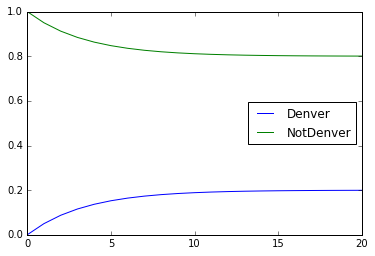

In [19]:
x.plot() #Plot Simulation

Let us now use now define many different starting values

In [20]:
#-Build a Collection of Simulations-#
seq = []
for v in np.arange(0,1.1,0.2):
    x = [np.array([v,1-v])] #Initial Values for Denver and NotDenver#
    for i in range(20):
        x.append(x[i] @ A)
    x = pd.DataFrame(x, columns=['Denver','NotDenver'])
    seq.append(x)

In [21]:
#-Consider the Initial Conditions-#
print("Initial Conditions")
for item in seq:
    print(item.head(1))

Initial Conditions
   Denver  NotDenver
0       0          1
   Denver  NotDenver
0     0.2        0.8
   Denver  NotDenver
0     0.4        0.6
   Denver  NotDenver
0     0.6        0.4
   Denver  NotDenver
0     0.8        0.2
   Denver  NotDenver
0       1          0


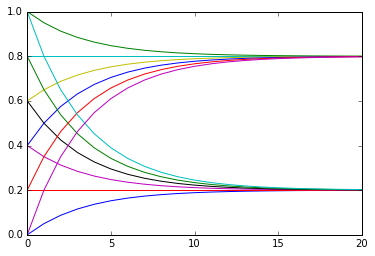

In [22]:
#-Plot the different paths on the same canvas-#
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()
for item in seq:
    item.plot(ax=ax, legend=False)

**Excercise \#3:** Solve the steady state values using the eigenvalues and eigenvectors of the $A$ matrix

**Excercise \#4:** Find the eigenvalues of this Markov matrix (hint: their sum is the trace)

$$
A = 
\begin{bmatrix}
  0.9 & 0.15 \\
  0.1 & 0.85 
 \end{bmatrix}
$$

What is the steady state eigenvector for the eivenvalue $\lambda_1 = 1$?

**Question \#5:** What are the eigenvalues and steady state eigenvectors for these Markov matrices?

$$
A = 
\begin{bmatrix}
  0.1 & 0.2 \\
  0 & 0.8 
\end{bmatrix}
$$

$$
B =
\begin{bmatrix}
  0.2 & 1 \\
  0.8 & 0
\end{bmatrix}
$$

$$
C = 
\begin{bmatrix}
  0.5 & 0.25 & 0.25 \\
  0.25 & 0.5 & 0.25 \\
  0.25 & 0.25 & 0.5
\end{bmatrix}
$$